In [37]:
from google.colab import files
uploaded = files.upload()

Saving The Worlds Billionaires Dataset 1987-2022.csv to The Worlds Billionaires Dataset 1987-2022.csv


In [38]:
import pandas as pd
import plotly.express as px

# Load the dataset into a pandas DataFrame, specifying 'latin1' encoding to handle potential character issues
df = pd.read_csv('/content/The Worlds Billionaires Dataset 1987-2022.csv', encoding='latin1')

# Display the first 5 rows and info to understand the data
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataFrame Info:")
df.info()

First 5 rows of the dataset:


,Year,Yearly ranking,Name,Net worth (USD)\n(billion),Age,Nationality,Source(s) of wealth
0,2022,1,Elon Musk,$219 billion,50,United States,"Tesla, SpaceX"
1,2022,2,Jeff Bezos,$177 billion,58,United States,Amazon
2,2022,3,Bernard Arnault & family,$158 billion,73,France,LVMH
3,2022,4,Bill Gates,$129 billion,66,United States,Microsoft
4,2022,5,Warren Buffett,$118 billion,91,United States,Berkshire Hathaway



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       362 non-null    int64 
 1   Yearly ranking             362 non-null    object
 2   Name                       362 non-null    object
 3   Net worth (USD)
(billion)  362 non-null    object
 4   Age                        362 non-null    object
 5   Nationality                362 non-null    object
 6   Source(s) of wealth        362 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.9+ KB


In [39]:
# Clean the 'Net worth (USD) (billion)' column
df['Net worth\xa0(USD)\n(billion)'] = df['Net worth\xa0(USD)\n(billion)'].astype(str).str.replace('billion', '').str.replace('$', '').str.replace(',', '').str.strip()
df['Net worth\xa0(USD)\n(billion)'] = pd.to_numeric(df['Net worth\xa0(USD)\n(billion)'], errors='coerce')

# Drop rows where 'Net worth (USD) (billion)' is NaN after conversion
df.dropna(subset=['Net worth\xa0(USD)\n(billion)'], inplace=True)

# Ensure 'Nationality' and 'Source(s) of wealth' are strings and fill any NaNs if necessary
df['Nationality'] = df['Nationality'].astype(str).fillna('Unknown Nationality')
df['Source(s) of wealth'] = df['Source(s) of wealth'].astype(str).fillna('Unknown Source')

print("\nDataFrame after cleaning 'Net worth' and handling NaNs:")
df.info()


DataFrame after cleaning 'Net worth' and handling NaNs:
<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 361
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       360 non-null    int64  
 1   Yearly ranking             360 non-null    object 
 2   Name                       360 non-null    object 
 3   Net worth (USD)
(billion)  360 non-null    float64
 4   Age                        360 non-null    object 
 5   Nationality                360 non-null    object 
 6   Source(s) of wealth        360 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.5+ KB


In [40]:
# Create a treemap to visualize the distribution of wealth by nationality and source of wealth
# The hierarchy will be Nationality -> Source(s) of wealth
# The size of the rectangles will be based on 'Net worth (USD) (billion)'

fig = px.treemap(df,
                 path=[px.Constant("All Billionaires"), 'Nationality', 'Source(s) of wealth'],
                 values='Net worth\xa0(USD)\n(billion)',
                 title='Distribution of Billionaires\' Net Worth by Nationality and Source of Wealth',
                 color='Net worth\xa0(USD)\n(billion)', # Color by net worth for visual distinction
                 color_continuous_scale='RdBu' # Choose a color scale
                )

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [41]:
import plotly.express as px

# Define the year to filter the data for. Change this variable to explore different years.
year_to_filter = 2022 # You can change this to any year present in your dataset

# Filter the DataFrame for the selected year
df_filtered_by_year = df[df['Year'] == year_to_filter]

# Create a treemap to visualize the distribution of wealth by nationality and individual billionaire for the selected year
# Using a blue color scale where higher net worth appears darker.
fig_year_filtered_blue = px.treemap(df_filtered_by_year,
                                 path=[px.Constant("Billionaires"), 'Nationality', 'Name'],
                                 values='Net worth\xa0(USD)\n(billion)',
                                 title=f'Billionaires\' Net Worth by Nationality and Individual in {year_to_filter} (Blue Scale)',
                                 color='Net worth\xa0(USD)\n(billion)', # Color by net worth for visual distinction
                                 color_continuous_scale='Blues', # Use a blue color scale, darker for higher net worth
                                 custom_data=['Name', 'Nationality', 'Net worth\xa0(USD)\n(billion)', 'Source(s) of wealth'] # Include custom data for hover info
                                )

fig_year_filtered_blue.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_year_filtered_blue.show()

print(f"Treemap displayed for the year: {year_to_filter}. To view other years, change the 'year_to_filter' variable in the code above and re-run the cell.")

Treemap displayed for the year: 2022. To view other years, change the 'year_to_filter' variable in the code above and re-run the cell.


In [42]:
import plotly.express as px



fig_sunburst = px.sunburst(df,
                         path=['Nationality', 'Source(s) of wealth'],
                         values='Net worth\xa0(USD)\n(billion)',
                         title='Distribution of Billionaires\' Net Worth by Nationality and Source of Wealth (Sunburst)',
                         color='Net worth\xa0(USD)\n(billion)',
                         color_continuous_scale='Viridis'
                        )

fig_sunburst.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_sunburst.show()

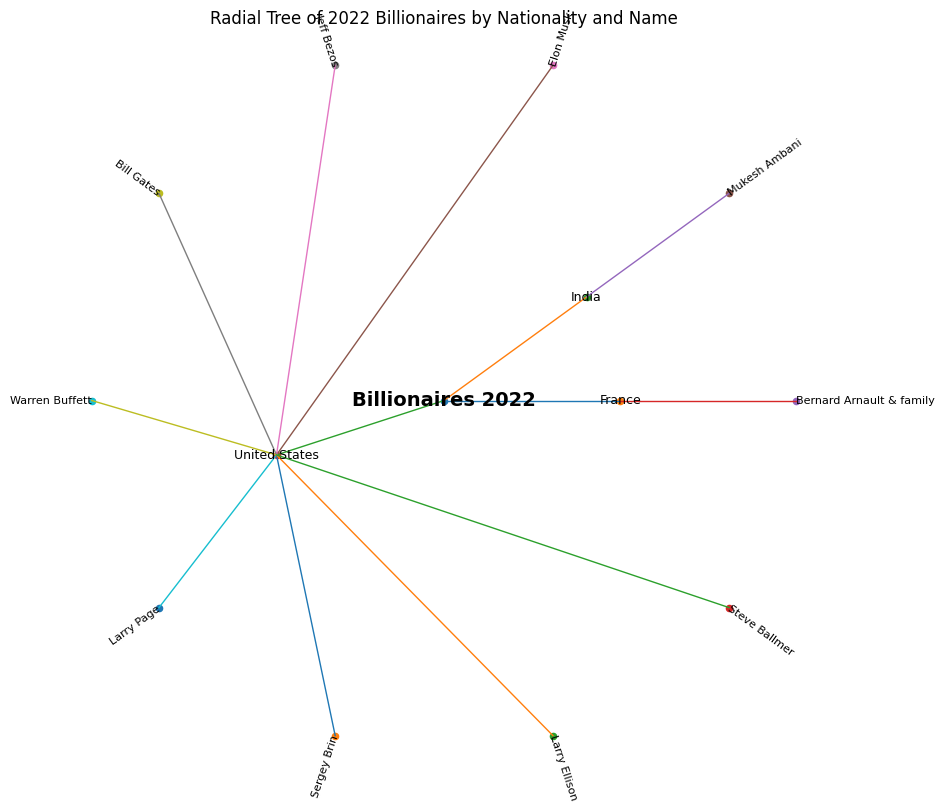

In [43]:
import math
import matplotlib.pyplot as plt

# ------------ CONFIG ------------
year_to_plot = 2022      # change this if you want a different year
# -------------------------------

# Filter to a single year so the radial tree is readable
df_year = df[df["Year"] == year_to_plot].copy()

# Clean nationality text (remove stray spaces / non-breaking spaces)
df_year["Nationality_clean"] = df_year["Nationality"].astype(str).str.strip()

root_label = f"Billionaires {year_to_plot}"

# Group by nationality
groups = df_year.groupby("Nationality_clean")

# Build list of leaves: (nationality, name)
leaves = []
for nat, sub in groups:
    for _, row in sub.iterrows():
        leaves.append((nat, row["Name"]))

n_leaves = len(leaves)
if n_leaves == 0:
    raise ValueError(f"No rows found for year {year_to_plot}. Check the 'Year' values in df.")

# Assign an angle to each leaf around the circle
leaf_angles = {}
for i, (nat, name) in enumerate(leaves):
    theta = 2 * math.pi * i / n_leaves
    leaf_angles[name] = theta

# Angle for each nationality = average of its leaves
nat_angles = {}
for nat, sub in groups:
    thetas = [leaf_angles[row["Name"]] for _, row in sub.iterrows()]
    nat_angles[nat] = sum(thetas) / len(thetas)

# Radii for each level
r_root = 0.0
r_nat  = 1.0
r_leaf = 2.0

# Positions for plotting
positions = {}

# Root in the center
positions[root_label] = (0.0, 0.0)

# Nationalities on middle ring
for nat, theta in nat_angles.items():
    x = r_nat * math.cos(theta)
    y = r_nat * math.sin(theta)
    positions[nat] = (x, y)

# Leaves (names) on outer ring
for nat, name in leaves:
    theta = leaf_angles[name]
    x = r_leaf * math.cos(theta)
    y = r_leaf * math.sin(theta)
    positions[name] = (x, y)

# ---------- PLOT ----------
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")
ax.axis("off")

# Draw edges: root -> nationality
for nat in nat_angles:
    x0, y0 = positions[root_label]
    x1, y1 = positions[nat]
    ax.plot([x0, x1], [y0, y1], linewidth=1)

# Draw edges: nationality -> leaf (name)
for nat, name in leaves:
    x0, y0 = positions[nat]
    x1, y1 = positions[name]
    ax.plot([x0, x1], [y0, y1], linewidth=1)

# Draw nodes
for node, (x, y) in positions.items():
    ax.scatter(x, y, s=20)

# Label root
ax.text(
    0, 0,
    root_label,
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold"
)

# Label nationalities
for nat in nat_angles:
    x, y = positions[nat]
    ax.text(x, y, nat, ha="center", va="center", fontsize=9)

# Label leaves (rotate text so it follows the circle)
for nat, name in leaves:
    x, y = positions[name]
    theta = leaf_angles[name]
    angle_deg = math.degrees(theta)

    # Flip labels on the left side so they aren't upside-down
    if 90 <= angle_deg <= 270:
        rotation = angle_deg + 180
        ha = "right"
    else:
        rotation = angle_deg
        ha = "left"

    ax.text(
        x,
        y,
        name,
        fontsize=8,
        rotation=rotation,
        rotation_mode="anchor",
        ha=ha,
        va="center"
    )

plt.title(f"Radial Tree of {year_to_plot} Billionaires by Nationality and Name")
plt.show()


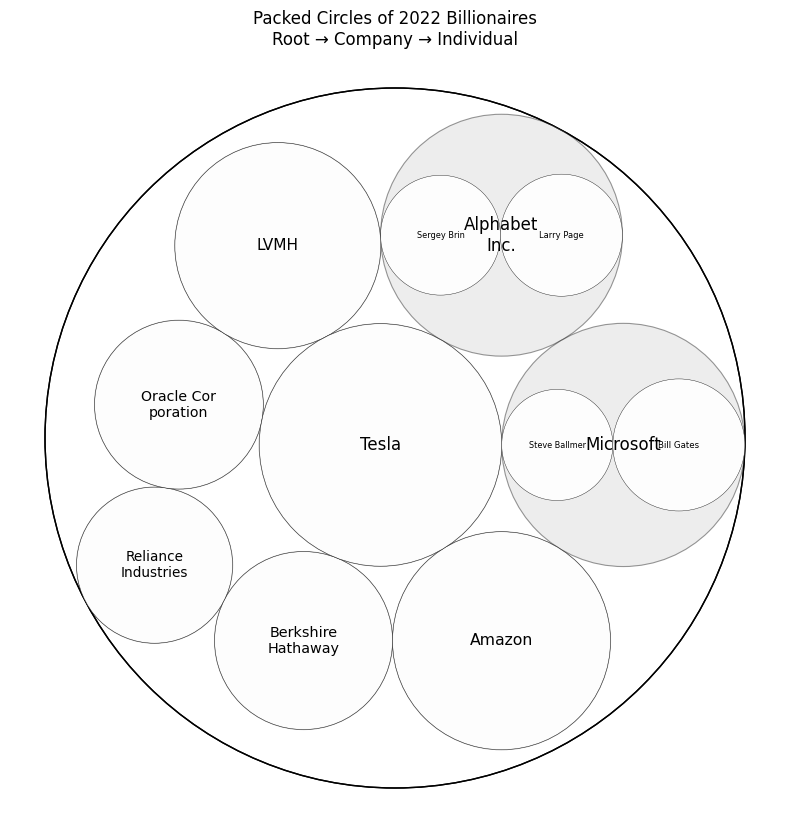


Top companies by TOTAL billionaire wealth in 2022:


,Company,NetWorthBillions
0,Microsoft,220.4
1,Tesla,219.0
2,Alphabet Inc.,218.0
3,Amazon,177.0
4,LVMH,158.0
5,Berkshire Hathaway,118.0
6,Oracle Corporation,106.0
7,Reliance Industries,90.7



Top 3 billionaires in 2022:


,Name,NetWorthBillions,Source(s) of wealth
0,Elon Musk,219.0,"Tesla, SpaceX"
1,Jeff Bezos,177.0,Amazon
2,Bernard Arnault & family,158.0,LVMH



Companies with the MOST billionaires in 2022:


,Company,NumBillionaires
0,Alphabet Inc.,2
1,Microsoft,2
2,Berkshire Hathaway,1
3,Amazon,1
4,LVMH,1
5,Oracle Corporation,1
6,Reliance Industries,1
7,Tesla,1



Compare number of billionaires vs total wealth (top 10):


,Company,NumBillionaires,NetWorthBillions
1,Microsoft,2,220.4
0,Alphabet Inc.,2,218.0
7,Tesla,1,219.0
3,Amazon,1,177.0
4,LVMH,1,158.0
2,Berkshire Hathaway,1,118.0
5,Oracle Corporation,1,106.0
6,Reliance Industries,1,90.7


In [45]:
# ======================================================
# PACKED CIRCLES: Root → Company → Billionaire (1 year)
# with reduced label overlap
# ======================================================

# If circlify is not installed yet, run this once:
!pip install circlify

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import circlify
import textwrap

# -----------------------------
# 1. Clean and prepare the data
# -----------------------------

net_col = "Net worth\xa0(USD)\n(billion)"

df["NetWorthBillions"] = (
    df[net_col]
      .astype(str)
      .str.replace(r"[^0-9.\-]", "", regex=True)
      .replace("", np.nan)
      .astype(float)
)

year_to_plot = 2022   # change if you want a different year
df_year = df[df["Year"] == year_to_plot].copy()

# Primary company / industry from the first part of "Source(s) of wealth"
df_year["Company"] = (
    df_year["Source(s) of wealth"]
      .astype(str)
      .str.split(",")
      .str[0]
      .str.strip()
)

# ---------------------------------------------
# 2. Build hierarchical structure for circlify
# ---------------------------------------------

people = (
    df_year.groupby(["Company", "Name"])["NetWorthBillions"]
           .sum()
           .reset_index()
)

# Number of billionaires per company (for label rules)
company_bil_count = (
    people.groupby("Company")["Name"]
          .nunique()
          .to_dict()
)

# Map name -> company (to know which company each level-3 circle belongs to)
name_to_company = dict(zip(people["Name"], people["Company"]))

company_nodes = []
for comp, sub in people.groupby("Company"):
    children = []
    for _, row in sub.iterrows():
        val = row["NetWorthBillions"]
        if np.isnan(val) or val <= 0:
            val = 0.01
        children.append({
            "id": row["Name"],
            "datum": float(val)
        })

    total_val = sub["NetWorthBillions"].sum()
    if np.isnan(total_val) or total_val <= 0:
        total_val = 0.01

    company_nodes.append({
        "id": comp,
        "datum": float(total_val),
        "children": children
    })

total_root = sum(node["datum"] for node in company_nodes)

tree_data = [{
    "id": f"All Billionaires {year_to_plot}",
    "datum": float(total_root),
    "children": company_nodes
}]

# -----------------------------
# 3. Compute packed-circle layout
# -----------------------------

circles = circlify.circlify(
    tree_data,
    show_enclosure=True,
    target_enclosure=circlify.Circle(0, 0, 1)
)

# -----------------------------
# 4. Plot with better labels
# -----------------------------

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
ax.set_aspect("equal")

# Axis limits so we see the full layout
all_x = [c.x for c in circles]
all_y = [c.y for c in circles]
all_r = [c.r for c in circles]

x_min = min(x - r for x, r in zip(all_x, all_r))
x_max = max(x + r for x, r in zip(all_x, all_r))
y_min = min(y - r for y, r in zip(all_y, all_r))
y_max = max(y + r for y, r in zip(all_y, all_r))

margin = 0.1
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)

# Max radii for scaling font sizes
max_r_level2 = max(c.r for c in circles if getattr(c, "level", 0) == 2)
max_r_level3 = max(c.r for c in circles if getattr(c, "level", 0) == 3)

for circle in circles:
    x, y, r = circle.x, circle.y, circle.r
    level = getattr(circle, "level", 0)
    label = ""
    if hasattr(circle, "ex") and circle.ex and isinstance(circle.ex, dict):
        label = circle.ex.get("id", "")

    # Level 1: root – outline only, no label
    if level == 1:
        ax.add_patch(
            plt.Circle((x, y), r, edgecolor="black", linewidth=1.0, fill=False)
        )

    # Level 2: company circles (always label companies)
    elif level == 2:
        ax.add_patch(
            plt.Circle(
                (x, y), r,
                edgecolor="black",
                linewidth=0.8,
                facecolor="lightgray",
                alpha=0.4
            )
        )
        if label:
            wrapped = "\n".join(textwrap.wrap(label, width=10))
            fs = 6 + 6 * (r / max_r_level2)
            ax.text(
                x, y, wrapped,
                ha="center", va="center",
                fontsize=fs
            )

    # Level 3: individual billionaires
    elif level == 3:
        ax.add_patch(
            plt.Circle(
                (x, y), r,
                edgecolor="black",
                linewidth=0.3,
                facecolor="white",
                alpha=0.9
            )
        )
        # Only label billionaires when the company has >1 billionaire,
        # so we don't stack the company + single person in the same spot.
        company = name_to_company.get(label)
        if company is None:
            continue

        if company_bil_count.get(company, 1) == 1:
            # single-billionaire company → keep only the company label
            continue

        if r > 0.08 and label:
            fs = 4 + 4 * (r / max_r_level3)
            ax.text(
                x, y, label,
                ha="center", va="center",
                fontsize=fs
            )

plt.title(
    f"Packed Circles of {year_to_plot} Billionaires\n"
    "Root → Company → Individual"
)
plt.show()

# ---------------------------------------------------
# 5. Tables to answer your written questions
# ---------------------------------------------------

print(f"\nTop companies by TOTAL billionaire wealth in {year_to_plot}:")
company_totals = (
    people.groupby("Company")["NetWorthBillions"]
          .sum()
          .sort_values(ascending=False)
          .reset_index()
)
display(company_totals.head(10))

print(f"\nTop 3 billionaires in {year_to_plot}:")
top3 = (
    df_year.sort_values("NetWorthBillions", ascending=False)
           .loc[:, ["Name", "NetWorthBillions", "Source(s) of wealth"]]
           .head(3)
)
display(top3)

print(f"\nCompanies with the MOST billionaires in {year_to_plot}:")
company_counts_df = (
    people.groupby("Company")["Name"]
          .nunique()
          .sort_values(ascending=False)
          .reset_index(name="NumBillionaires")
)
display(company_counts_df.head(10))

print("\nCompare number of billionaires vs total wealth (top 10):")
merged = company_counts_df.merge(company_totals, on="Company", how="left")
merged = merged.sort_values(["NumBillionaires", "NetWorthBillions"],
                            ascending=[False, False])
display(merged.head(10))


### **1. Which company occupies the largest portion of the treemap? What does this suggest about global wealth concentration?**

In the treemap visualization, **Microsoft** occupies the largest area, representing a combined billionaire wealth of roughly **$220.4 billion**, primarily attributed to **Bill Gates** and **Steve Ballmer**. This dominance underscores the **concentration of global wealth** within a small group of powerful technology companies. Corporations such as **Microsoft, Tesla, Alphabet Inc.,** and **Amazon** account for a significant share of billionaire wealth, indicating that the global financial landscape is heavily influenced by the **tech sector** and a handful of leading firms. Such uneven distribution reveals that **a limited number of companies and individuals control a disproportionate portion of global wealth**, reflecting the growing **centralization of economic power** in the modern digital economy.

### **2. Identify the top three billionaires represented. Which industries do they belong to?**

The **top three billionaires** in the 2022 dataset are **Elon Musk**, **Jeff Bezos**, and **Bernard Arnault & family**.

- **Elon Musk** holds the highest net worth at **\$219 billion**, primarily generated through **Tesla** and **SpaceX**, placing him within the **electric vehicle**, **renewable energy**, and **aerospace** industries.  
- **Jeff Bezos**, with **\$177 billion**, built his fortune through **Amazon**, representing the **e-commerce** and **cloud computing** sectors.  
- **Bernard Arnault & family** rank third with **\$158 billion**, associated with **LVMH**, a leader in **luxury goods** and **fashion**.

Together, these figures highlight how modern wealth is concentrated across **dominant global industries**—technology, digital commerce, and luxury—each shaping different facets of the global economy.

### **3. Which company appears to have the most number of billionaires? Does this always correspond to the highest wealth?**

In 2022, **Alphabet Inc.** and **Microsoft** each have **two prominent billionaires**. Alphabet includes **Sergey Brin** and **Larry Page**, while Microsoft features **Bill Gates** and **Steve Ballmer**. However, a larger number of billionaires does not necessarily translate to greater total wealth. For instance, **Tesla**, represented solely by **Elon Musk**, nearly equals Microsoft’s total at **$219 billion**, despite having only one billionaire. This illustrates that **the quantity of billionaires within a company does not directly reflect total wealth**—a single individual with exceptional net worth can surpass the combined fortunes of multiple peers from another corporation.